# Computer Vision Assignments: Sessions 1 & 2

This notebook contains tasks and assignments based on Sessions 1 and 2. You are required to implement the functions and complete the exercises as described. Use OpenCV and other necessary libraries like NumPy and Matplotlib.

**Instructions:**
- Complete each task in the provided code cells.
- Test your implementations with sample images (e.g., download test images [here](https://sipi.usc.edu/database/database.php?volume=misc) or [here](https://www.hlevkin.com/hlevkin/06testimages.htm) or use your own test images).
- Include comments in your code for clarity.
- Display results using cv2.imshow() or Matplotlib where appropriate.
- Submit the completed notebook along with any output images or explanations on [our google drive for the CV sessions](https://drive.google.com/drive/folders/1IjVhJmAXxNQTGT-ybJ-yc5smYtR5v8CO?usp=sharing) **upload your files in a new folder under your name**

## Session 1: Basic Image Operations (Reading, Resizing, Cropping, Rotating)

### Task 1: Read and Display an Image
Read an image from a file and display it in both BGR and grayscale formats. Handle errors if the image cannot be read.

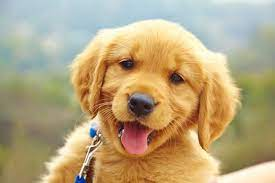

Grayscale Image:


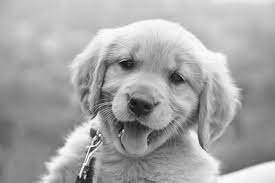

In [2]:
import cv2 as cv
import numpy as np
import sys
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
%matplotlib inline

# Your code here
path = r'/content/dogBGR.jpg'
img = cv.imread(path)  # Replace with your image path
cv2_imshow(img)
# Read in BGR

# Read in Grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
print("Grayscale Image:")
cv2_imshow(gray)
# Display both using cv.imshow() or plt.imshow()

### Task 2: Resize Image with Aspect Ratio Preservation
Implement resizing while preserving aspect ratio. Downscale to 60% and upscale to 200%. Compare shapes and display originals vs resized.

Original Image:


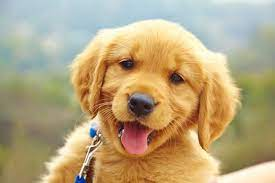

Downscaled (60%):


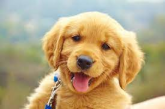

Upscaled (200%):


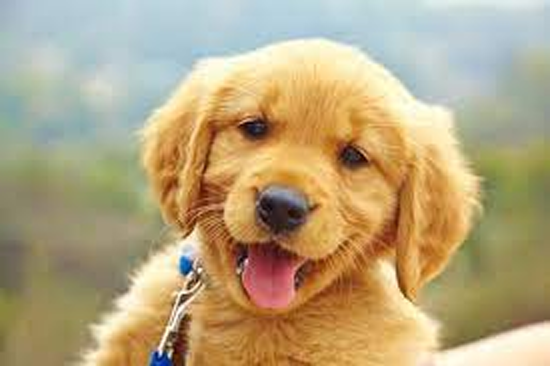

In [5]:
h, w = img.shape[:2]
new_dim_down = (int(w * 0.6), int(h * 0.6))  # (width, height)
img_down = cv.resize(img, new_dim_down, interpolation=cv.INTER_AREA)

    # Step 3: Upscale to 200%
new_dim_up = (int(w * 2.0), int(h * 2.0))
img_up = cv.resize(img, new_dim_up, interpolation=cv.INTER_CUBIC)

    # Step 4: Display
print("Original Image:")
cv2_imshow(img)
print("Downscaled (60%):")
cv2_imshow(img_down)

print("Upscaled (200%):")
cv2_imshow(img_up)

### Task 3: Resize Without Preserving Aspect Ratio
Resize only width to 100 pixels, only height to 200 pixels, and both to (200, 200). Display and discuss distortions.

Original Image:


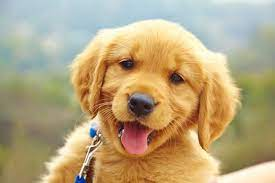

Width = 100 (distorted horizontally):


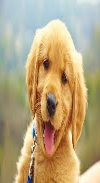

Height = 200 (distorted vertically):


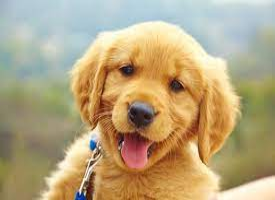

Resized to (200, 200) (may distort if original is not square):


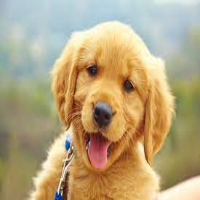

In [7]:
h, w = img.shape[:2]

    # Step 2: Resize width only → set width=100, keep original height
resize_w = cv.resize(img, (100, h))

    # Step 3: Resize height only → set height=200, keep original width
resize_h = cv.resize(img, (w, 200))

    # Step 4: Resize both → (200, 200)
resize_both = cv.resize(img, (200, 200))

    # Step 5: Display results
print("Original Image:")
cv2_imshow(img)

print("Width = 100 (distorted horizontally):")
cv2_imshow(resize_w)

print("Height = 200 (distorted vertically):")
cv2_imshow(resize_h)

print("Resized to (200, 200) (may distort if original is not square):")
cv2_imshow(resize_both)

### Task 4: Resize Using Scale Factors (fx, fy)
Scale up by 1.2 in both directions and down by 0.6. Use different interpolations (INTER_LINEAR, INTER_NEAREST) and compare quality.

Original:


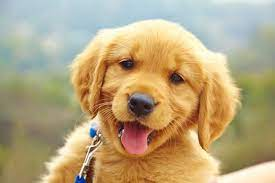

Scaled UP (1.2x) - INTER_LINEAR (smoother):


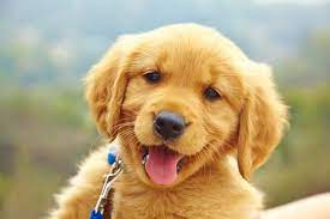

Scaled UP (1.2x) - INTER_NEAREST (blocky):


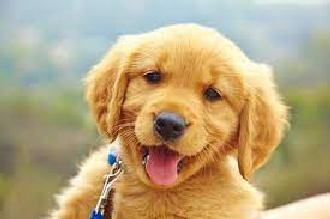

Scaled DOWN (0.6x) - INTER_LINEAR (smooth reduction):


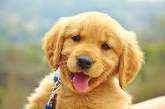

Scaled DOWN (0.6x) - INTER_NEAREST (blocky reduction):


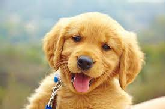

In [8]:
h, w = img.shape[:2]

    # Scale factors
scale_up = 1.2
scale_down = 0.6

    # Dimensions
up_dim = (int(w * scale_up), int(h * scale_up))
down_dim = (int(w * scale_down), int(h * scale_down))

    # Scaling with INTER_LINEAR
up_linear = cv.resize(img, up_dim, interpolation=cv.INTER_LINEAR)
down_linear = cv.resize(img, down_dim, interpolation=cv.INTER_LINEAR)

    # Scaling with INTER_NEAREST
up_nearest = cv.resize(img, up_dim, interpolation=cv.INTER_NEAREST)
down_nearest = cv.resize(img, down_dim, interpolation=cv.INTER_NEAREST)

    # Show results
print("Original:")
cv2_imshow(img)

print("Scaled UP (1.2x) - INTER_LINEAR (smoother):")
cv2_imshow(up_linear)
print("Scaled UP (1.2x) - INTER_NEAREST (blocky):")
cv2_imshow(up_nearest)

print("Scaled DOWN (0.6x) - INTER_LINEAR (smooth reduction):")
cv2_imshow(down_linear)

print("Scaled DOWN (0.6x) - INTER_NEAREST (blocky reduction):")
cv2_imshow(down_nearest)

### Task 5: Cropping an Image
Crop a region (e.g., [20:200, 50:200]) from the image. Display original and cropped.

Original Image:


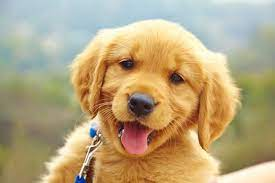

Cropped Region [20:200, 50:200]:


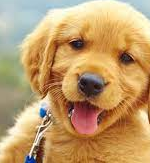

In [9]:
 cropped = img[20:200, 50:200]

    # Display original
print("Original Image:")
cv2_imshow(img)

    # Display cropped
print("Cropped Region [20:200, 50:200]:")
cv2_imshow(cropped)

### Task 6: Advanced Cropping - Patch Image into Blocks
Divide the image into 4 equal blocks (2x2 grid) by cropping. Display each block separately and then stitch them back using NumPy concatenation to verify.

Top Left:


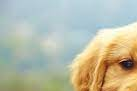

Top Right:


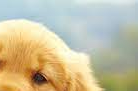

Bottom Left:


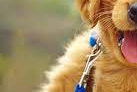

Bottom Right:


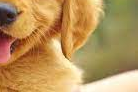

Reconstructed Image (stitched back):


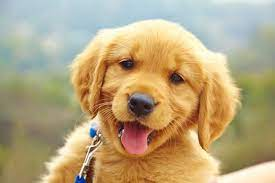

In [10]:
h, w = img.shape[:2]

    # Find mid-points
mid_h = h // 2
mid_w = w // 2

    # Split into 4 blocks (2x2 grid)
top_left  = img[0:mid_h, 0:mid_w]
top_right = img[0:mid_h, mid_w:w]
bottom_left  = img[mid_h:h, 0:mid_w]
bottom_right = img[mid_h:h, mid_w:w]

    # Display each block
print("Top Left:")
cv2_imshow(top_left)

print("Top Right:")
cv2_imshow(top_right)

print("Bottom Left:")
cv2_imshow(bottom_left)

print("Bottom Right:")
cv2_imshow(bottom_right)

    # Stitch back the blocks
top_row = np.hstack((top_left, top_right))      # Horizontal concat
bottom_row = np.hstack((bottom_left, bottom_right))
reconstructed = np.vstack((top_row, bottom_row)) # Vertical concat

    # Display reconstructed image
print("Reconstructed Image (stitched back):")
cv2_imshow(reconstructed)

### Task 7: Rotating an Image
Rotate the image by 45°, 90°, and 180° using getRotationMatrix2D and warpAffine. Display all rotations.

Original Image:


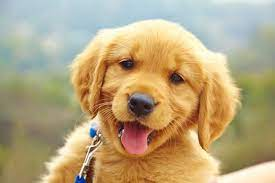

Rotated 45°:


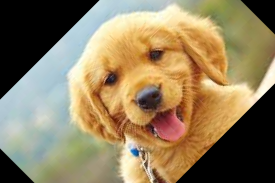

Rotated 90°:


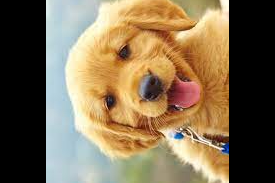

Rotated 180°:


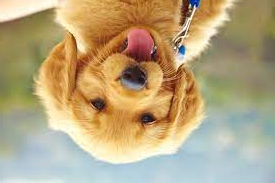

In [14]:
h, w = img.shape[:2]
center = (w // 2, h // 2)
M45 = cv.getRotationMatrix2D(center, 45, 1.0)   # 45° rotation
M90 = cv.getRotationMatrix2D(center, 90, 1.0)   # 90° rotation
M180 = cv.getRotationMatrix2D(center, 180, 1.0) # 180° rotation

    # Apply warpAffine
rotated_45 = cv.warpAffine(img, M45, (w, h))
rotated_90 = cv.warpAffine(img, M90, (w, h))
rotated_180 = cv.warpAffine(img, M180, (w, h))

    # Display results
print("Original Image:")
cv2_imshow(img)

print("Rotated 45°:")
cv2_imshow(rotated_45)

print("Rotated 90°:")
cv2_imshow(rotated_90)

print("Rotated 180°:")
cv2_imshow(rotated_180)

### Task 8: Rotate with Scaling
Rotate by 45° and scale by 0.5 in **one** operation. Compare with separate resize and rotate.

Original Image:


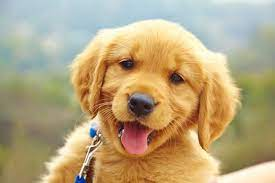

Rotate + Scale in One Step (45°, 0.5):


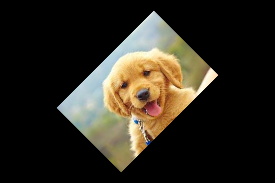

Separate Resize (0.5) then Rotate (45°):


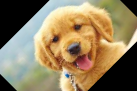

In [17]:
h, w = img.shape[:2]
center = (w // 2, h // 2)

# --- Method 1: Rotate + Scale together ---
M = cv.getRotationMatrix2D(center, 45, 0.5)  # rotate 45°, scale 0.5
rotated_scaled = cv.warpAffine(img, M, (w, h))

    # --- Method 2: Separate Resize then Rotate ---
resized = cv.resize(img, (w // 2, h // 2))  # scale by 0.5 first
new_h, new_w = resized.shape[:2]
new_center = (new_w // 2, new_h // 2)
M_sep = cv.getRotationMatrix2D(new_center, 45, 1.0)  # rotate only
rotated_then_scaled = cv.warpAffine(resized, M_sep, (new_w, new_h))

    # --- Display results ---
print("Original Image:")
cv2_imshow(img)
print("Rotate + Scale in One Step (45°, 0.5):")
cv2_imshow(rotated_scaled)

print("Separate Resize (0.5) then Rotate (45°):")
cv2_imshow(rotated_then_scaled)

## Session 2: Image Acquisition, Formats, Color Spaces, Enhancement, and Filtering

### Task 9: Read Image in Different Color Spaces
Read an image in BGR, convert to RGB (for Matplotlib), HSV, LAB and Grayscale. Display all.

BGR (default OpenCV):


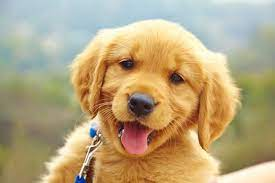

RGB (for Matplotlib):


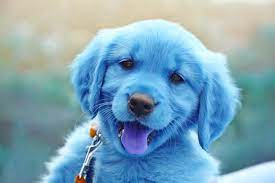

HSV (Hue, Saturation, Value):


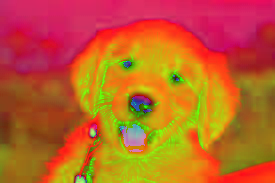

LAB (Lightness and color channels):


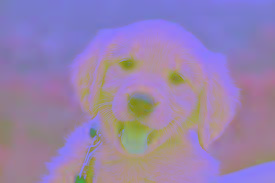

Grayscale:


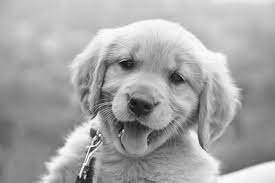

In [20]:
img_rgb = cv.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv.cvtColor(img, cv2.COLOR_BGR2HSV)
img_lab = cv.cvtColor(img, cv2.COLOR_BGR2LAB)
img_gray = cv.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Display all
print("BGR (default OpenCV):")
cv2_imshow(img)

print("RGB (for Matplotlib):")
cv2_imshow(img_rgb)

print("HSV (Hue, Saturation, Value):")
cv2_imshow(img_hsv)

print("LAB (Lightness and color channels):")
cv2_imshow(img_lab)

print("Grayscale:")
cv2_imshow(img_gray)

### Task 10: Image Sharpening
Apply cv2.blur() with a 5x5 kernel, then use cv2.filter2D() with sharpening kernels of varying strengths (e.g., [[0, -1, 0], [-1, 5, -1], [0, -1, 0]] and [[0, -2, 0], [-2, 9, -2], [0, -2, 0]]).
Compare between original and sharpened image after blurring.

Original Image:


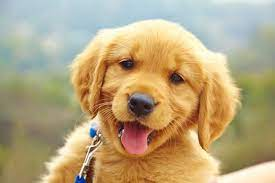

Blurred (5x5):


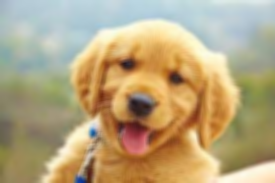

Sharpened with Kernel 1 (mild):


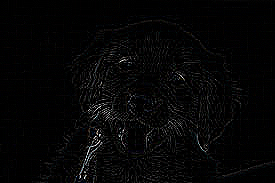

Sharpened with Kernel 2 (strong):


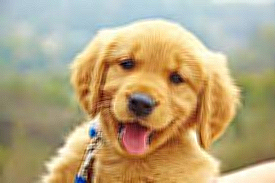

In [26]:
blurred = cv.blur(img, (5,5))

    # Step 2: Define sharpening kernels
kernel1 = np.array([[0, -1, 0],
                        [-1,  4, -1],
                        [0, -1, 0]], dtype=np.float32)

kernel2 = np.array([[0, -2, 0],
                        [-2,  9, -2],
                        [0, -2, 0]], dtype=np.float32)

    # Step 3: Apply sharpening using filter2D
sharpened1 = cv.filter2D(blurred, -1, kernel1)
sharpened2 = cv.filter2D(blurred, -1, kernel2)

    # Step 4: Show results
print("Original Image:")
cv2_imshow(img)
print("Blurred (5x5):")
cv2_imshow(blurred)
print("Sharpened with Kernel 1 (mild):")
cv2_imshow(sharpened1)
print("Sharpened with Kernel 2 (strong):")
cv2_imshow(sharpened2)

In [ ]:
laplacian_filt = np.array([[0, 1, 0],
                           [1, -4, 1],
                           [0, 1, 0]])
laplacian_filt

array([[ 0,  1,  0],
       [ 1, -4,  1],
       [ 0,  1,  0]])

### Task 11: Add Salt and Pepper Noise to Image
Implement a function to add salt and pepper noise to an image. Control noise density (e.g., 0.05).

In [6]:
# Your code here
def add_salt_pepper_noise(image, density=0.05):

    noisy = img.copy()
    h, w = img.shape[:2]
    num_noise = int(density * h * w)  # total noisy pixels

    # Add salt (white) pixels
    coords = [np.random.randint(0, i - 1, num_noise) for i in (h, w)]
    noisy[coords[0], coords[1]] = 255

    # Add pepper (black) pixels
    coords = [np.random.randint(0, i - 1, num_noise) for i in (h, w)]
    noisy[coords[0], coords[1]] = 0

    return noisy
# Apply to an image and display

### Task 12: Remove Salt and Pepper Noise Using Median Filter
Apply cv.medianBlur() to a noisy image. Experiment with kernel sizes (3,5,7) and compare results.

Original Image:


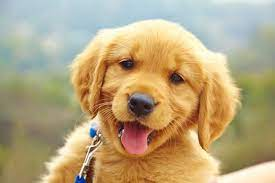

Noisy Image:


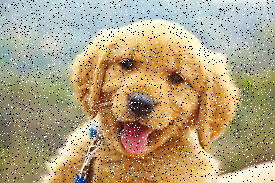

Median Filter (3x3 kernel):


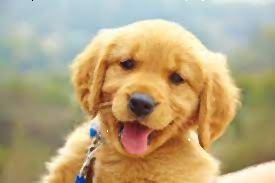

Median Filter (5x5 kernel):


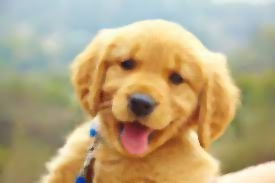

Median Filter (7x7 kernel):


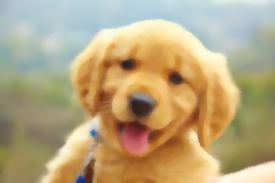

In [28]:
    # Step 1: Add noise
noisy_img = add_salt_pepper_noise(img, density=0.05)

    # Step 2: Apply median filters
median3 = cv.medianBlur(noisy_img, 3)
median5 = cv.medianBlur(noisy_img, 5)
median7 = cv.medianBlur(noisy_img, 7)

    # --- Display results ---
print("Original Image:")
cv2_imshow(img)

print("Noisy Image:")
cv2_imshow(noisy_img)
print("Median Filter (3x3 kernel):")
cv2_imshow(median3)
print("Median Filter (5x5 kernel):")
cv2_imshow(median5)
print("Median Filter (7x7 kernel):")
cv2_imshow(median7)

### Task 13: Implement Adaptive Median Filter
Write a custom function for adaptive median filtering. It should dynamically increase window size until noise is removed or max size is reached. Apply to a noisy image and compare with standard median.

In [11]:
def adaptive_median_filter(img, max_window_size=7):
    # If grayscale
    if len(img.shape) == 2:
        return _adaptive_median_gray(img, max_window_size)

    # If color → split channels
    channels = cv.split(img)
    filtered_channels = []
    for ch in channels:
        filtered_channels.append(_adaptive_median_gray(ch, max_window_size))
    return cv.merge(filtered_channels)


def _adaptive_median_gray(img, max_window_size):
    padded = np.pad(img, max_window_size//2, mode='edge')
    filtered = np.zeros_like(img)
    rows, cols = img.shape

    for i in range(rows):
        for j in range(cols):
            window_size = 3
            while window_size <= max_window_size:
                half = window_size // 2
                region = padded[i:i+window_size, j:j+window_size]
                z_min, z_max, z_med = np.min(region), np.max(region), np.median(region)
                z_xy = img[i, j]

                if z_min < z_med < z_max:
                    if z_min < z_xy < z_max:
                        filtered[i, j] = z_xy
                    else:
                        filtered[i, j] = z_med
                    break
                else:
                    window_size += 2
                    if window_size > max_window_size:
                        filtered[i, j] = z_med
    return filtered
# Test on noisy image

### Task 14: Implement Bilateral Filter Function
Write a Python function to perform bilateral filtering on an image. Use Gaussian weights for both spatial and intensity. Parameters: diameter, sigma_color, sigma_space. Compare with cv.bilateralFilter().

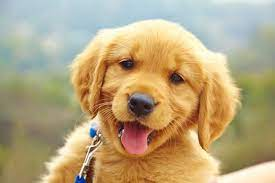

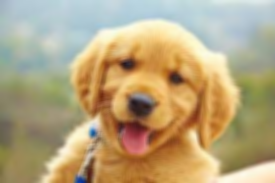

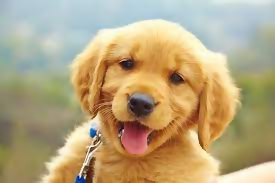

In [3]:
import cv2 as cv
import numpy as np

def bilateral_filter_custom_gray(img, diameter, sigma_color, sigma_space):
    # Padding to handle borders
    padded = cv.copyMakeBorder(img, diameter//2, diameter//2, diameter//2, diameter//2,
                               cv.BORDER_REFLECT)
    filtered = np.zeros_like(img, dtype=np.float32)

    # Precompute spatial Gaussian (depends only on pixel distances)
    ax = np.arange(-diameter//2 + 1, diameter//2 + 1)
    xx, yy = np.meshgrid(ax, ax)
    spatial_gaussian = np.exp(-(xx**2 + yy**2) / (2 * sigma_space**2))

    # Process each pixel
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            region = padded[y:y+diameter, x:x+diameter]

            # Intensity Gaussian (depends on pixel differences)
            intensity_gaussian = np.exp(-((region - img[y, x])**2) / (2 * sigma_color**2))

            # Combine weights
            weights = spatial_gaussian * intensity_gaussian
            weights /= np.sum(weights)

            # Weighted sum
            filtered[y, x] = np.sum(region * weights)

    return np.uint8(filtered)


def bilateral_filter_custom(img, diameter, sigma_color, sigma_space):
    # If grayscale → process directly
    if len(img.shape) == 2:
        return bilateral_filter_custom_gray(img, diameter, sigma_color, sigma_space)

    # If color image → process each channel separately
    channels = cv.split(img)
    filtered_channels = []
    for ch in channels:
        filtered_ch = bilateral_filter_custom_gray(ch, diameter, sigma_color, sigma_space)
        filtered_channels.append(filtered_ch)

    return cv.merge(filtered_channels)

# Apply to image, display, and compare with OpenCV's version

custom_bilateral = bilateral_filter_custom(img, diameter=5, sigma_color=50, sigma_space=50)
opencv_bilateral = cv.bilateralFilter(img, d=5, sigmaColor=50, sigmaSpace=50)

# Show results
cv2_imshow(img)
cv2_imshow(custom_bilateral)
cv2_imshow(opencv_bilateral)

### [BONUS] Task 15: Comprehensive Camera Task
Combine: Live camera feed -> grayscale -> add noise -> remove with median -> sharpen. Display all stages in separate windows.

In [4]:
# To read video from camera example:

camera_id = 0
delay = 400
window_name = 'frame'

cap = cv.VideoCapture(camera_id)

if not cap.isOpened():
    sys.exit()

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    cv.imshow(window_name, frame)
    if cv.waitKey(delay) & 0xFF == ord('q'):
        break

cap.release()
cv.destroyWindow(window_name)


# Your code here

SystemExit: 

/usr/local/lib/python3.12/dist-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


### [BONUS]Task 16: Comprehensive Video Task
Similar to Task 18 but for a video file. Save the final processed video.

In [ ]:
# Your code here

### Task 17: Performance Comparison
Time the execution of standard median vs adaptive median on a large noisy image. Discuss when adaptive median filter is better.

Standard Median Time: 0.008193016052246094 seconds
Adaptive Median Time: 4.229489088058472 seconds


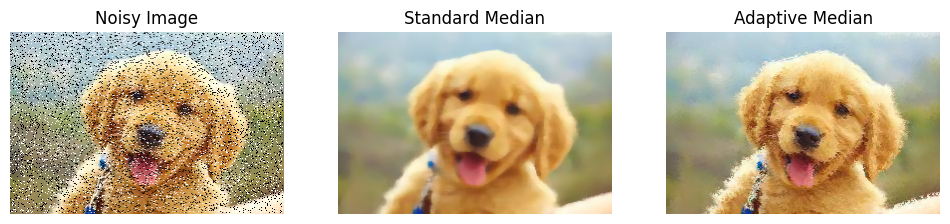

In [25]:
import time
noisy_img = add_salt_pepper_noise(img, density=0.1)

# Time standard median
start = time.time()
std_result = cv.medianBlur(noisy_img, 7)
print("Standard Median Time:", time.time() - start, "seconds")

# Time adaptive median
start = time.time()
adaptive_result = adaptive_median_filter(noisy_img, 7)
print("Adaptive Median Time:", time.time() - start, "seconds")

# --- Show Results ---
plt.figure(figsize=(12,6))
noisy_img=cv.cvtColor(noisy_img, cv.COLOR_BGR2RGB)
plt.subplot(1,3,1)
plt.imshow(noisy_img)
plt.title("Noisy Image")
plt.axis("off")
std_result=cv.cvtColor(std_result, cv.COLOR_BGR2RGB)
plt.subplot(1,3,2)
plt.imshow(std_result)
plt.title("Standard Median")
plt.axis("off")
adaptive_result=cv.cvtColor(adaptive_result, cv.COLOR_BGR2RGB)
plt.subplot(1,3,3)
plt.imshow(adaptive_result)
plt.title("Adaptive Median")
plt.axis("off")

plt.show()